## Feature Engineering
Create some features to any exisiting one

In [1]:
import pandas as pd
import string

### Load Dataset

In [2]:
# Read the raw data in and create header for the data
data = pd.read_csv('SMSSpamCollection.tsv', sep='\t', header=None)
data.columns = ['label', 'body_text']


### Create some feature

In [3]:
# We want to add a feature based on the legnth of text. Remember the need to remove whitespaces
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))


# Create function to count the number of times a punctuation showed up in text, sum them and round to 3 decimal places
def count_punct(text):
   count_char = sum([1 for char in text if char in string.punctuation])
   return round(count_char/(len(text) - text.count(" ")), 3) * 100


# Create a new column for the feature by apply the above func
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()


,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


### Evaluate created features

In [4]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline


In [7]:
print(dir(np))
data.head()

['ALLOW_THREADS', 'AxisError', 'BUFSIZE', 'CLIP', 'ComplexWarning', 'DataSource', 'ERR_CALL', 'ERR_DEFAULT', 'ERR_IGNORE', 'ERR_LOG', 'ERR_PRINT', 'ERR_RAISE', 'ERR_WARN', 'FLOATING_POINT_SUPPORT', 'FPE_DIVIDEBYZERO', 'FPE_INVALID', 'FPE_OVERFLOW', 'FPE_UNDERFLOW', 'False_', 'Inf', 'Infinity', 'MAXDIMS', 'MAY_SHARE_BOUNDS', 'MAY_SHARE_EXACT', 'ModuleDeprecationWarning', 'NAN', 'NINF', 'NZERO', 'NaN', 'PINF', 'PZERO', 'RAISE', 'RankWarning', 'SHIFT_DIVIDEBYZERO', 'SHIFT_INVALID', 'SHIFT_OVERFLOW', 'SHIFT_UNDERFLOW', 'ScalarType', 'Tester', 'TooHardError', 'True_', 'UFUNC_BUFSIZE_DEFAULT', 'UFUNC_PYVALS_NAME', 'VisibleDeprecationWarning', 'WRAP', '_CopyMode', '_NoValue', '_UFUNC_API', '__NUMPY_SETUP__', '__all__', '__builtins__', '__cached__', '__config__', '__deprecated_attrs__', '__dir__', '__doc__', '__expired_functions__', '__file__', '__getattr__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_add_newdoc_ufunc', '_distributor_in

,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


AttributeError: Rectangle.set() got an unexpected keyword argument 'normed'

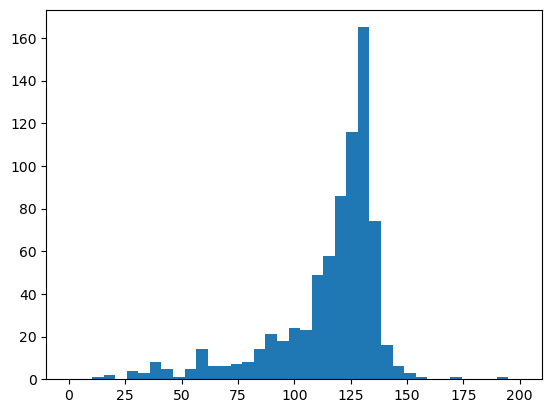

In [6]:
# Create a array of evenly spaced values according to the 'start' 'stop' and 'num parameters set using numpy arrays. The array will have the length of 'num'. Powerful tool for visualisation and computing
bins = np.linspace(0, 200, 40)

# Plot histogram to have an overview of the data, watch out for the long tail of outliers which can introduce bias or imbalance.
pyplot.hist(data[data['label']=='spam']['body_len'], bins, alpha=0.5, normed=True, label='spam')
pyplot.hist(data[data['label']=='ham']['body_len'], bins, alpha=0.5, normed=True, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

AttributeError: Rectangle.set() got an unexpected keyword argument 'normed'

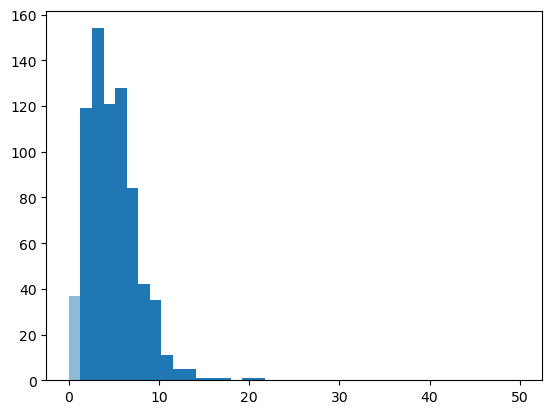

In [8]:
# Repeat. Create a array of evenly spaced values according to the 'start' 'stop' and 'num parameters set using numpy arrays. The array will have the length of 'num'. Powerful tool for visualisation and computing
bins = np.linspace(0, 50, 40)

# Again. Plot histogram, check for long tail, the normed option takes care of the outliers, dragging them towards the central data. alpha sets the darkeness of the bars.
pyplot.hist(data[data['label']=='spam']['punct%'], bins, alpha=0.5, normed=True, label='spam')
pyplot.hist(data[data['label']=='ham']['punct%'], bins, alpha=0.5, normed=True, label='ham')
pyplot.legend('upper right')
pyplot.show()

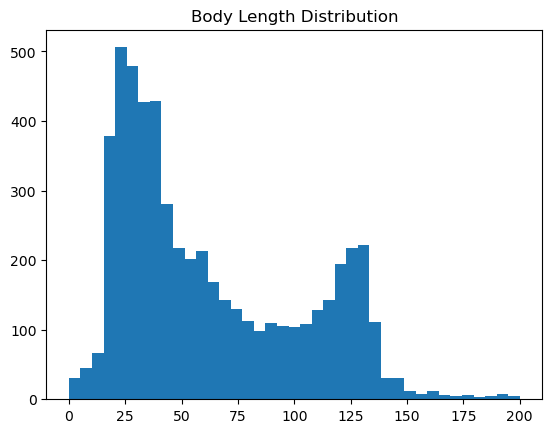

In [10]:
# Repeat. Create a array of evenly spaced values according to the 'start' 'stop' and 'num parameters set using numpy arrays. The array will have the length of 'num'. Powerful tool for visualisation and computing
bins = np.linspace(0, 200, 40)

# Again. Plot histogram, check for long tail, the normed option takes care of the outliers, dragging them towards the central data. alpha sets the darkeness of the bars.
pyplot.hist(data['body_len'], bins)
pyplot.title("Body Length Distribution")
pyplot.show()


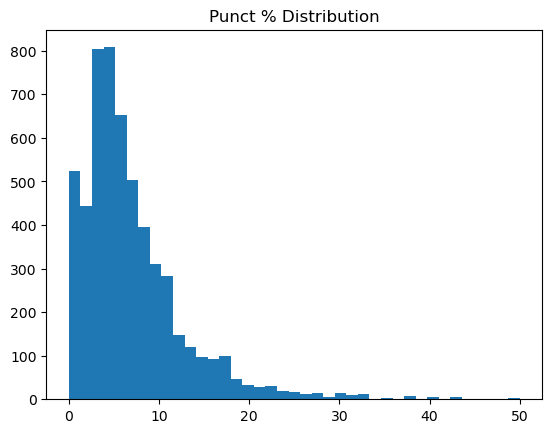

In [11]:
# Repeat. Create a array of evenly spaced values according to the 'start' 'stop' and 'num parameters set using numpy arrays. The array will have the length of 'num'. Powerful tool for visualisation and computing
bins = np.linspace(0, 50, 40)

# Again. Plot histogram, check for long tail, the normed option takes care of the outliers, dragging them towards the central data. alpha sets the darkeness of the bars.
pyplot.hist(data['punct%'], bins)
pyplot.title("Punct % Distribution")
pyplot.show()